# Optimización de funciones escalares diferenciables con `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" width="300px" height="100px" />

- Mediante optimización se obtienen soluciones elegantes tanto en teoría como en ciertas aplicaciones. 
- La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
- Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
- El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

**Referencia:**
- http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml



<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/OpenStreetMap_routing_service.png/300px-OpenStreetMap_routing_service.png" width="300px" height="100px" />

### Algunas aplicaciones son:

1. **Ingeniería:**
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
 - Análisis conformacional - Isomería conformacional en modelado molecular
 - Desempeño en fermentación de productos.
 - Estimación de parámetros en bioquímica e ingeniería metabólica.
 
 
2. **Distribución óptima de recursos:**
 - Distribución de rutas de vuelo.
 - Encontrar una dieta óptima.
 - Planeación de ruta óptima.
 
 
3. **Optimización financiera:**
 - Administración de riesgos.
 - Portafolios de inversión.
 - Problema de maximización de la utilidad.
 - 

### <p style="color:green;">En esta clase veremos aspectos básicos de optimización. Específicamente, veremos cómo obtener máximos y mínimos de una función escalar de una variable (como en cálculo diferencial).</p>

<img style="float: center" src="https://matematicasies.com/local/cache-vignettes/L337xH278/extremos-77d0a.png" width="400px" height="100px" />

___
## 0. Librerías que usaremos
<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Python3-powered_hello-world.svg/1000px-Python3-powered_hello-world.svg.png" width="300px" height="100px" />

Como ya dijimos en la primer clase `python` es el lenguaje de programación (el cual es de alto nivel). Sin embargo, `python` solo tiene unos pocos comandos primitivos y para hacer más fácil su uso en nuestras actividades de simulación en ingeniería, otras personas ya han escrito ciertas librerías por nosotros.

### 0.1 `NumPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.numpy.org/_static/numpy_logo.png" width="300px" height="100px" />

`NumPy` (Numerical Python) es la librería fundamental para computación científica (numérica) con `Python`. Contiene, entre otras cosas:
- un objeto tipo arreglo N-dimensional muy poderoso
- funciones sofisticadas
- funciones de álgebra lineal, transformada de Fourier y números aleatorios.

Por lo anterior, `NumPy` es de amplio uso entre la comunidad científica e ingenieril (por su manejo de cantidades vectoriales). De la misma manera, se usa para guardar datos. Para nuestros propósitos, se puede usar libremente.

**Referencia:**
- http://www.numpy.org/

`NumPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [1]:
# Importar librería numpy
import numpy as np

### 0.2 `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.sympy.org/static/images/logo.png" width="300px" height="100px" />

`SymPy` (Symbolic Python) es una librería de `Python` para matemáticas simbólicas. Su objetivo es convertirse en un sistema de álgebra computacional con las mejores características, manteniendo el código lo más simple posible para que sea comprensible.

**Referencia:**
- http://www.sympy.org/en/index.html

`SymPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [2]:
#Importarmos la librería sympy
import sympy as sym

# Imprimir datos en formato Latex
sym.init_printing(use_latex='mathjax')

La funcionalidad de imprimir en formato LaTex que nos da `SymPy` mediante el proyecto `mathjax` hace de `SymPy` una herramienta muy atractiva...

Notar que en `SymPy` y en `NumPy` existen funciones con el mismo nombre, pero reciben tipos de datos diferentes...

In [6]:
sym.cos(10)

cos(10)

In [10]:
sym.var('x',real=True)

sym.cos(x)

cos(x)

Explicar el uso de la sintaxis `from numpy import *` y sus peligros (no recomendable).

In [ ]:
# importar con * y ver que pasa
#from numpy import *
#from sympy import *
# No recomendado
#b=array([3])
#b
#cos(x), 
#cos(3.1416)

### 0.3 `PyPlot` de `matplotlib`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://matplotlib.org/_static/logo2.svg" width="300px" height="100px" />

El módulo `PyPlot` de la librería `matplotlib` contiene funciones que nos permite generar una gran cantidad de gráficas rápidamente. Las funciones de este módulo están escritas con el mismo nombre que las funciones para graficar en `Matlab`.

**Referencia:**
- https://matplotlib.org/api/pyplot_summary.html

In [10]:
# importar matplotlib.pyplot
import matplotlib.pyplot as plt
# comando para que las gráficas salgan en la misma ventana
%matplotlib inline

Ya que revisamos todas las librerías que usaremos, empecemos con la clase como tal...

___
<p style="color:red;">Todos los resultados que veremos son basados en el siguiente teorema:</p>

## 1. Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$, y si la derivada $f'(c)$ existe en el punto $c$, entonces $f'(c) = 0$.

### Ejemplo

Sabemos que la función $f(x)=(x-2)^2$ tiene un mínimo global en $x=2$, pues

$$f(x)=(x-2)^2\geq0,\qquad\text{y}\qquad f(x)=(x-2)^2=0 \qquad\text{si y solo si}\qquad x=2.$$

In [33]:
#Declarar variable x como real
sym.var("x",real=True)

x

In [4]:
# Declarar función f y mostrar
f = (x-2)**2
f

       2
(x - 2) 

In [5]:
# Encontrar la primera derivada de la función f
df = sym.diff(f,x)
df

2⋅x - 4

In [6]:
#Resolver f'(x)= 0 y mostrar punto
xc = sym.solve(df,x)
xc

[2]

Veamos la gráfica...

In [7]:
# Convertir función simbólica f a una función numérica
fnum = sym.lambdify(x,f,modules="numpy")

In [13]:
# Definir coordenas x
xnum = np.linspace(-4,8,200)
ynum = fnum(xnum)

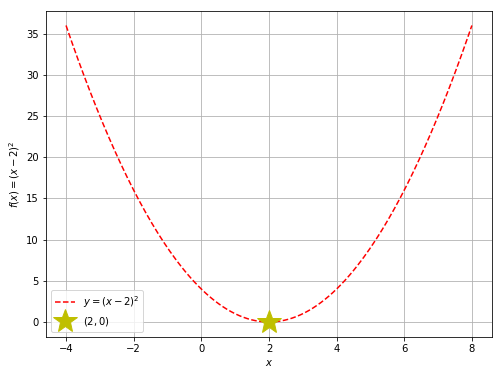

In [21]:
# Graficar
# Crear nueva ventana de gráficos y se da medida a la ventana
plt.figure(figsize=(8,6))

plt.plot(xnum,ynum,"--r",label = "$y=(x-2)^2$")
plt.plot([2],[0],'*y',ms=25,label='$(2,0)$')

#Nombrar los ejes de la gráfica
plt.xlabel("$x$")
plt.ylabel("$f(x)=(x-2)^2$")
plt.legend(loc="best")
plt.grid()
plt.show()

### **Otra manera de hacer lo anterior**

Revisemos el concepto de función en `Python`

In [22]:
#Definimos una función en Python
def funcion_f(x):
    return (x-2)**2

In [23]:
x

x

In [24]:
f_sym = funcion_f(x)
f_sym

       2
(x - 2) 

In [28]:
df = sym.diff(f_sym,x)
df

2⋅x - 4

In [29]:
xc = sym.solve(df,x)
xc

[2]

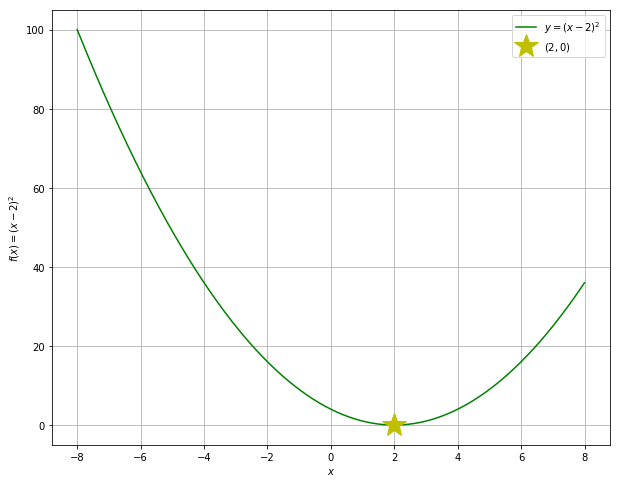

In [32]:
# Graficar
xnum = np.linspace(-8,8,500)
ynum = funcion_f(xnum)

# Crear el tamaño de la figura a graficar
plt.figure(figsize=(10,8))

plt.plot(xnum,ynum,"g",label = "$y=(x-2)^2$")
plt.plot([2],[0],'*y',ms=25,label='$(2,0)$')

#Nombrar los ejes de la gráfica
plt.xlabel("$x$")
plt.ylabel("$f(x)=(x-2)^2$")
plt.legend(loc="best")
plt.grid()
plt.show()

**El converso del teorema anterior no es cierto.**

### Actividad
Considere $g(x)=(x-2)^3$. 
- Usando `sympy`, muestre que $g'(2)=0$.
- Sin embargo, descartar que $x=2$ es un extremo de $g(x)$ viendo su **gráfica**.

In [34]:
def g(x):
    return (x-2)**3

In [37]:
dg = sym.diff(g(x),x)
dg

         2
3⋅(x - 2) 

In [38]:
xc = sym.solve(dg,x)
xc

[2]

In [39]:
dg.subs(x,2)

0

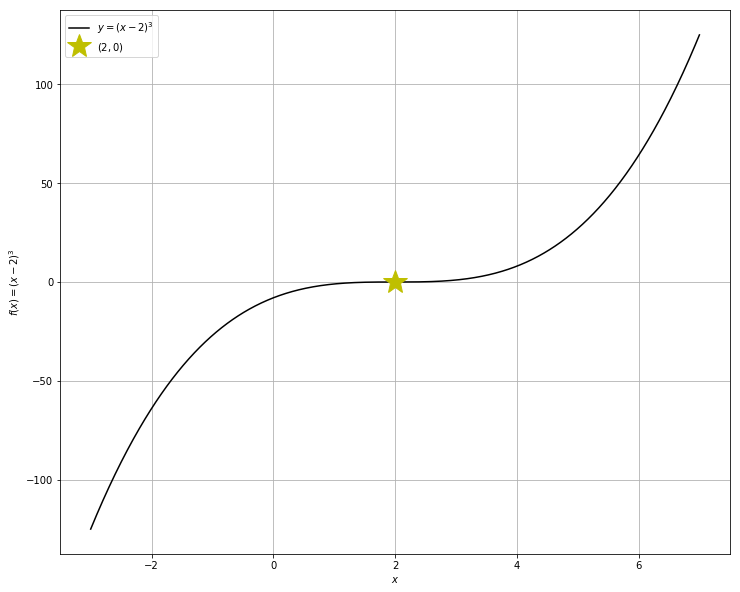

In [40]:
# Graficar
xnum = np.linspace(-3,7,1000)
ynum = g(xnum)

# Crear el tamaño de la figura a graficar
plt.figure(figsize=(12,10))

plt.plot(xnum,ynum,"k",label = "$y=(x-2)^3$")
plt.plot([2],[0],'*y',ms=25,label='$(2,0)$')

#Nombrar los ejes de la gráfica
plt.xlabel("$x$")
plt.ylabel("$f(x)=(x-2)^3$")
plt.legend(loc="best")
plt.grid()
plt.show()

## 2. Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f’(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f’’(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f’’(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f’’(c)=0$, entonces el criterio no decide. 

### Ejemplo

Mostrar, usando `sympy`, que la función $f(x)=(x-2)^2$ tiene un mínimo relativo en $x=2$.

Ya vimos que $f'(2)=0$. Notemos que:

In [41]:
def f1(x):
    return (x-2)**2

In [43]:
d2f = sym.diff(f1(x),x,2)
d2f

2

In [44]:
d2f.subs(x,2)

2

Por tanto, por el criterio de la segunda derivada, $f(2)=0$ es un mínimo relativo (en efecto, el mínimo global).

### Ejemplo
¿Qué pasa con $g(x)=(x-2)^3$ al intentar utilizar el criterio de la segunda derivada? (usar `sympy`).

In [45]:
def g1(x):
    return (x-2)**3

In [46]:
d2g = sym.diff(g1(x),x,2)
d2g

6⋅(x - 2)

In [47]:
d2g.subs(x,2)

0

Como $g''(2)=0$ entonces el criterio de la segunda derivada no concluye.

### Actividad

¿Qué pasa con $h(x)=(x-2)^4$ al intentar utilizar el criterio de la segunda derivada?.

In [48]:
def h(x):
    return (x-2)**4

In [49]:
dh = sym.diff(h(x),x)
dh

         3
4⋅(x - 2) 

In [50]:
xc = sym.solve(dh,x)
xc

[2]

In [51]:
dh2 = sym.diff(h(x),x,2)
dh2

          2
12⋅(x - 2) 

In [53]:
dh2.subs(x,2)

0

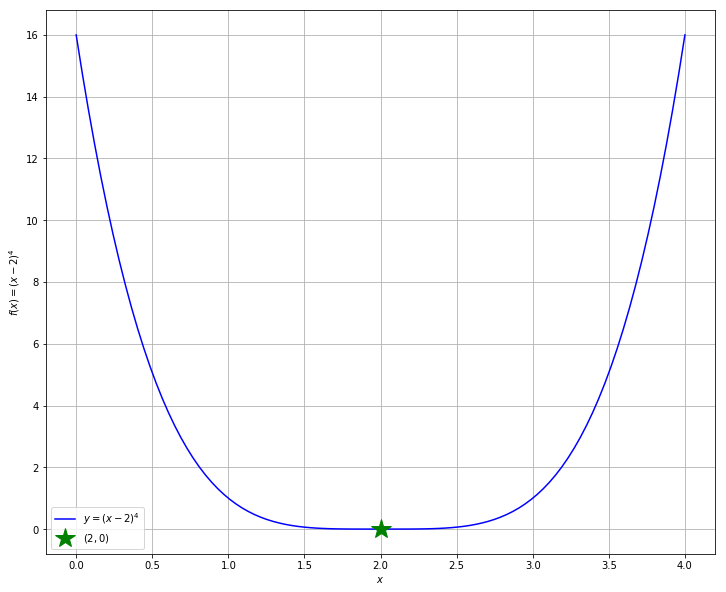

In [55]:
# Graficar
xnum = np.linspace(0,4,100)
ynum = h(xnum)

# Crear el tamaño de la figura a graficar
plt.figure(figsize=(12,10))

plt.plot(xnum,ynum,"b",label = "$y=(x-2)^4$")
plt.plot([2],[0],'*g',ms=20,label='$(2,0)$')

#Nombrar los ejes de la gráfica
plt.xlabel("$x$")
plt.ylabel("$f(x)=(x-2)^4$")
plt.legend(loc="best")
plt.grid()
plt.show()

## 3. Método para determinar extremos absolutos de una función continua y=f(x) en [a,b] 

- Determinar todos los valores críticos $c_1, c_2, c_3, \dots, c_n$ en $(a,b)$.
- Evaluar $f$ en todos los valores críticos y en los extremos $x=a$ y $x=b$.
- El más grande y el más pequeño de los valores de la lista $f(a), f(b), f(c_1), f(c_2), \dots, f(c_n)$ son el máximo absoluto y el mínimo absoluto, respectivamente, de $f$ en el intervalo $[a,b]$.

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-2x+5$ en $\left[0,3\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,3\right]$:

In [56]:
def f(x):
    return x**2-2*x+5

In [59]:
f(x)

 2          
x  - 2⋅x + 5

In [57]:
df = sym.diff(f(x),x)
df

2⋅x - 2

In [60]:
xc = sym.solve(df,x)
xc

[1]

Evaluamos $f$ en los extremos y en los puntos críticos:

In [61]:
f(0), f(1), f(3)

(5, 4, 8)

Concluimos que el máximo absoluto de $f$ en $\left[0,3\right]$ es $8$ y se alcanza en $x=3$, y que el mínimo absoluto es $4$ y se alcanza en $x=1$.

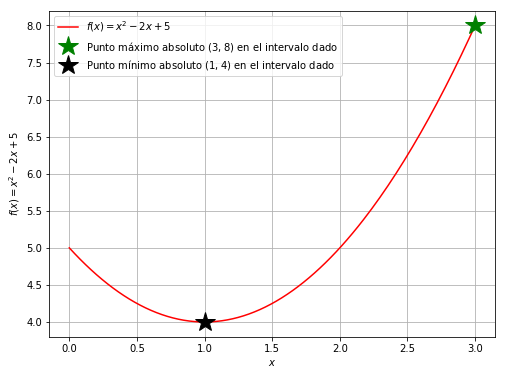

In [64]:
#Gráfica
xnum = np.linspace(0,3,150)
ynum = f(xnum)

# Crear el tamaño de la figura a graficar
plt.figure(figsize=(8,6))

plt.plot(xnum,ynum,"r",label = "$f(x)=x^2-2x+5$")
plt.plot([3],[8],'*g',ms=20,label='Punto máximo absoluto $(3,8)$ en el intervalo dado')
plt.plot([1],[4],'*k',ms=20,label='Punto mínimo absoluto $(1,4)$ en el intervalo dado')

#Nombrar los ejes de la gráfica
plt.xlabel("$x$")
plt.ylabel("$f(x)=x^2-2x+5$")
plt.legend(loc="best")
plt.grid()
plt.show()

### Actividad
Determinar los valores extremos absolutos de  $f(x) = (x-3)^2(x+3)^2$ en el intervalo $[1,\,4]$, usando `sympy`. Mostrar en una gráfica.

In [ ]:

#Grafica
# Crear nueva ventana de gráficos y se da medida a la ventana

#Nombrar los ejes de la gráfica


### En varias variables...

El procedimiento es análogo. 

Si una función $f:\mathbb{R}^n\to\mathbb{R}$ alcanza un máximo o mínimo local en $\boldsymbol{x}=\boldsymbol{c}\in\mathbb{R}^n$, y $f$ es diferenciable en el punto $\boldsymbol{x}=\boldsymbol{c}$, entonces $\left.\frac{\partial f}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{c}}=\boldsymbol{0}$ (todas las derivadas parciales en el punto $\boldsymbol{x}=\boldsymbol{c}$ son cero).

**Criterio de la segunda derivada:** para ver si es máximo o mínimo, se toma la segunda derivada (matriz jacobiana) y se verifica definición negativa o positiva, respectivamente.

Si se restringe a cierta región, hay ciertas técnicas. La más general, pero también la más compleja es la de **multiplicadores de Lagrange**.

**Ejemplo:** Determinar los valores extremo de $z(x,y)= (x-3)^2 + (y+5)^2$ usando el criterio de la segunda derivada y corroborarlo con la gráfica.

### Tarea 2.

1. Obtener máximos y mínimos absolutos, usando `sympy`, de las funciones dadas en los intervalos dados, y graficar la función en dicho intervalo señalando los puntos máximo y mínimo.

    + $f(x)=-3x^3+9x+2$ en $[-1.8,\,1.5]$
    + $g(x) = x^3-6x^2+9x-4$ en el intervalo $[0, \,2.5]$

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>